In [1]:
import pandas as pd
from plot_params import *

In [2]:
stat_all = pd.read_csv(outdir / 'neural_network_enrichment_human_30bp.csv', index_col = 0)  # from 6_analyze_RBPNet_scores-human-30bp.ipynb
stat_all.head()

,KS statistics,pvalue,RBPNet_model,category,median difference,sig,FDR,-log10 FDR,RBP_official,is_SynGo
0,6.597080e+10,2.219896e-254,DDX41_K562_5081,<-0.1,0.007828,True,6.797203e-254,253.167670,DDX41,False
1,1.850529e+10,2.244043e-126,DDX41_K562_5081,>0.1,0.011556,True,5.074765e-126,125.294584,DDX41,False
2,6.836932e+10,0.000000e+00,AQR_HepG2_ENCSR018WPY,<-0.1,0.005530,True,0.000000e+00,310.080093,AQR,False
3,1.605133e+10,2.265465e-08,AQR_HepG2_ENCSR018WPY,>0.1,0.001083,True,2.969133e-08,7.527370,AQR,False
4,6.151416e+10,2.720064e-63,HNRNPU_HepG2_ENCSR240MVJ,<-0.1,0.004376,True,4.705711e-63,62.327375,HNRNPU,True


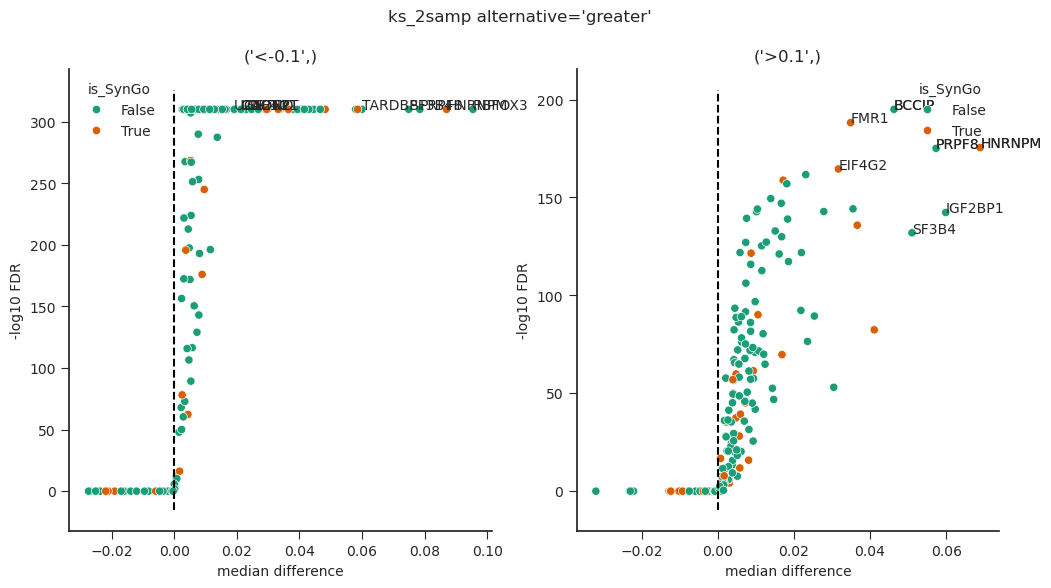

In [3]:
f, axes = plt.subplots(1,2, figsize = (12,6))
f.suptitle("ks_2samp alternative='greater'")
for ax, (name, group) in zip(axes.flatten(),stat_all.groupby(by = ['category'])):
    sns.scatterplot(data = group, x = 'median difference', y = '-log10 FDR', ax = ax, hue = 'is_SynGo')
    ax.set_title(name)
    sig1 = group.loc[(group['sig'])].sort_values(by = 'median difference', ascending = False).iloc[:5]
    sig2 = group.loc[(group['sig'])].sort_values(by = '-log10 FDR', ascending = False).iloc[:5]
    sig = pd.concat([sig1, sig2], axis = 0)
    for index, row in sig.iterrows():
        ax.text(row['median difference'], row['-log10 FDR'], row['RBPNet_model'].split('_')[0])
    ax.vlines(x = 0, ymin = ax.get_ylim()[0],ymax = ax.get_ylim()[1], linestyle = 'dashed', color = 'black')
sns.despine()
plt.savefig(figdir / 'human_30bp_volcano.pdf')

In [4]:
stat_all[(stat_all['sig']==True) & (stat_all['median difference']>0)]

,KS statistics,pvalue,RBPNet_model,category,median difference,sig,FDR,-log10 FDR,RBP_official,is_SynGo
0,6.597080e+10,2.219896e-254,DDX41_K562_5081,<-0.1,0.007828,True,6.797203e-254,253.167670,DDX41,False
1,1.850529e+10,2.244043e-126,DDX41_K562_5081,>0.1,0.011556,True,5.074765e-126,125.294584,DDX41,False
2,6.836932e+10,0.000000e+00,AQR_HepG2_ENCSR018WPY,<-0.1,0.005530,True,0.000000e+00,310.080093,AQR,False
3,1.605133e+10,2.265465e-08,AQR_HepG2_ENCSR018WPY,>0.1,0.001083,True,2.969133e-08,7.527370,AQR,False
4,6.151416e+10,2.720064e-63,HNRNPU_HepG2_ENCSR240MVJ,<-0.1,0.004376,True,4.705711e-63,62.327375,HNRNPU,True
...,...,...,...,...,...,...,...,...,...,...
339,1.569014e+10,2.904726e-03,CTCF_K562_4065,>0.1,0.000504,True,3.615235e-03,2.441863,CTCF,False
340,8.363647e+10,0.000000e+00,PTBP1_K562_5015,<-0.1,0.046655,True,0.000000e+00,310.080093,PTBP1,False
342,6.741044e+10,0.000000e+00,BUD13_K562_ENCSR663WES,<-0.1,0.011345,True,0.000000e+00,310.080093,BUD13,False
343,1.852957e+10,2.823070e-128,BUD13_K562_ENCSR663WES,>0.1,0.012731,True,6.468756e-128,127.189179,BUD13,False


In [29]:
len(set(stat_all['RBPNet_model'])), len(set(stat_all['RBP_official']))

(173, 126)

In [5]:
stat_all[(stat_all['sig']==True) & (stat_all['median difference']<0)]

,KS statistics,pvalue,RBPNet_model,category,median difference,sig,FDR,-log10 FDR,RBP_official,is_SynGo


Text(0, 0.5, 'Frequency')

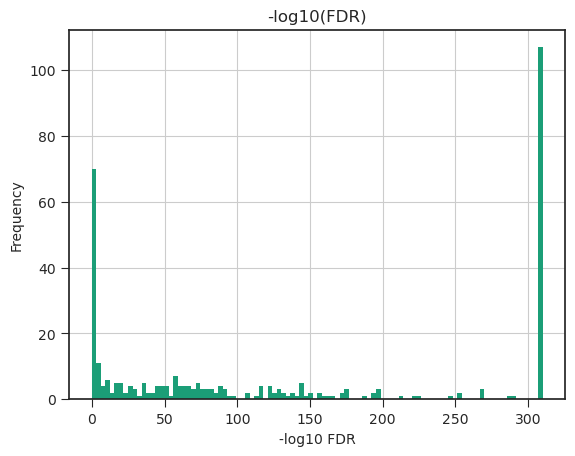

In [6]:
stat_all['-log10 FDR'].hist(bins = 100)
plt.title("-log10(FDR)")
plt.xlabel("-log10 FDR")
plt.ylabel("Frequency")

In [7]:
stat_all['pretty name']=stat_all['RBPNet_model'].apply(lambda s: s.split('_')[0]+'(' +s.split('_')[1]+ ')')
stat_all.head()

,KS statistics,pvalue,RBPNet_model,category,median difference,sig,FDR,-log10 FDR,RBP_official,is_SynGo,pretty name
0,6.597080e+10,2.219896e-254,DDX41_K562_5081,<-0.1,0.007828,True,6.797203e-254,253.167670,DDX41,False,DDX41(K562)
1,1.850529e+10,2.244043e-126,DDX41_K562_5081,>0.1,0.011556,True,5.074765e-126,125.294584,DDX41,False,DDX41(K562)
2,6.836932e+10,0.000000e+00,AQR_HepG2_ENCSR018WPY,<-0.1,0.005530,True,0.000000e+00,310.080093,AQR,False,AQR(HepG2)
3,1.605133e+10,2.265465e-08,AQR_HepG2_ENCSR018WPY,>0.1,0.001083,True,2.969133e-08,7.527370,AQR,False,AQR(HepG2)
4,6.151416e+10,2.720064e-63,HNRNPU_HepG2_ENCSR240MVJ,<-0.1,0.004376,True,4.705711e-63,62.327375,HNRNPU,True,HNRNPU(HepG2)


# Shows the RBPs with the highest median binding score difference (compared to background)
- median binding score difference = median dlogodds across motifs <-0.1 subtracting median dlogodds across <-0.1 <= 0 <= 0.1
- dlogodds = how well a given RBP is supposed to bind to sequence?
- So HNRNPM seems to bind significantly to hotspots considered to have "negative impact" (deletion of these hotspots will negatively impact the localization to the synapse)

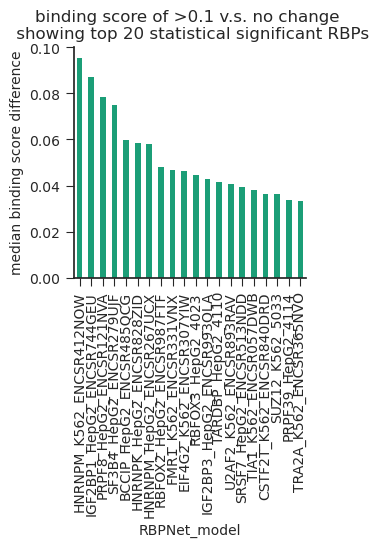

In [8]:
c = '<-0.1'
stat_all.loc[(stat_all['sig'])&(stat_all['category']==c)].sort_values(
    by = 'median difference', ascending = False
).iloc[:20].set_index('RBPNet_model')['median difference'].plot.bar(figsize = (3,3))
plt.ylabel(f'median binding score difference')
plt.title(f'binding score of {c} v.s. no change \n showing top 20 statistical significant RBPs')
sns.despine()
plt.savefig(figdir / f'human_30bp_barplot_{c}.pdf')

c = '>0.1'
stat_all.loc[(stat_all['sig'])&(stat_all['category']==c)].sort_values(
    by = 'median difference', ascending = False
).iloc[:20].set_index('RBPNet_model')['median difference'].plot.bar(figsize = (3,3))
plt.ylabel(f'median binding score difference')
plt.title(f'binding score of {c} v.s. no change \n showing top 20 statistical significant RBPs')
sns.despine()
plt.savefig(figdir / f'human_30bp_barplot_{c}.pdf')

## Try combining both into one bar plot

In [9]:
palette = sns.color_palette('tab10')
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [10]:
stat_all.head()

,KS statistics,pvalue,RBPNet_model,category,median difference,sig,FDR,-log10 FDR,RBP_official,is_SynGo,pretty name
0,6.597080e+10,2.219896e-254,DDX41_K562_5081,<-0.1,0.007828,True,6.797203e-254,253.167670,DDX41,False,DDX41(K562)
1,1.850529e+10,2.244043e-126,DDX41_K562_5081,>0.1,0.011556,True,5.074765e-126,125.294584,DDX41,False,DDX41(K562)
2,6.836932e+10,0.000000e+00,AQR_HepG2_ENCSR018WPY,<-0.1,0.005530,True,0.000000e+00,310.080093,AQR,False,AQR(HepG2)
3,1.605133e+10,2.265465e-08,AQR_HepG2_ENCSR018WPY,>0.1,0.001083,True,2.969133e-08,7.527370,AQR,False,AQR(HepG2)
4,6.151416e+10,2.720064e-63,HNRNPU_HepG2_ENCSR240MVJ,<-0.1,0.004376,True,4.705711e-63,62.327375,HNRNPU,True,HNRNPU(HepG2)


In [11]:
stat_all[stat_all['pretty name']=='HNRNPM(K562)']

,KS statistics,pvalue,RBPNet_model,category,median difference,sig,FDR,-log10 FDR,RBP_official,is_SynGo,pretty name
40,7.554450e+10,0.000000e+00,HNRNPM_K562_ENCSR412NOW,<-0.1,0.086982,True,0.000000e+00,310.080093,HNRNPM,True,HNRNPM(K562)
41,1.909522e+10,1.263250e-176,HNRNPM_K562_ENCSR412NOW,>0.1,0.068930,True,3.468925e-176,175.459805,HNRNPM,True,HNRNPM(K562)


In [12]:
top_stat = stat_all.loc[(stat_all['sig'])&(stat_all['category']!='middle')].sort_values(
    by = 'median difference', ascending = False
)
top_stat.head()

,KS statistics,pvalue,RBPNet_model,category,median difference,sig,FDR,-log10 FDR,RBP_official,is_SynGo,pretty name
120,7.869679e+10,0.000000e+00,RBFOX3_HepG2_4023,<-0.1,0.095387,True,0.000000e+00,310.080093,RBFOX3,False,RBFOX3(HepG2)
40,7.554450e+10,0.000000e+00,HNRNPM_K562_ENCSR412NOW,<-0.1,0.086982,True,0.000000e+00,310.080093,HNRNPM,True,HNRNPM(K562)
84,7.684796e+10,0.000000e+00,PRPF8_HepG2_ENCSR121NVA,<-0.1,0.078450,True,0.000000e+00,310.080093,PRPF8,False,PRPF8(HepG2)
70,7.609456e+10,0.000000e+00,SF3B4_HepG2_ENCSR279UJF,<-0.1,0.074914,True,0.000000e+00,310.080093,SF3B4,False,SF3B4(HepG2)
41,1.909522e+10,1.263250e-176,HNRNPM_K562_ENCSR412NOW,>0.1,0.068930,True,3.468925e-176,175.459805,HNRNPM,True,HNRNPM(K562)


In [13]:
topn = 50
top_stat = top_stat.sort_values(by='median difference', ascending=False).drop_duplicates(['RBP_official']).iloc[:topn]

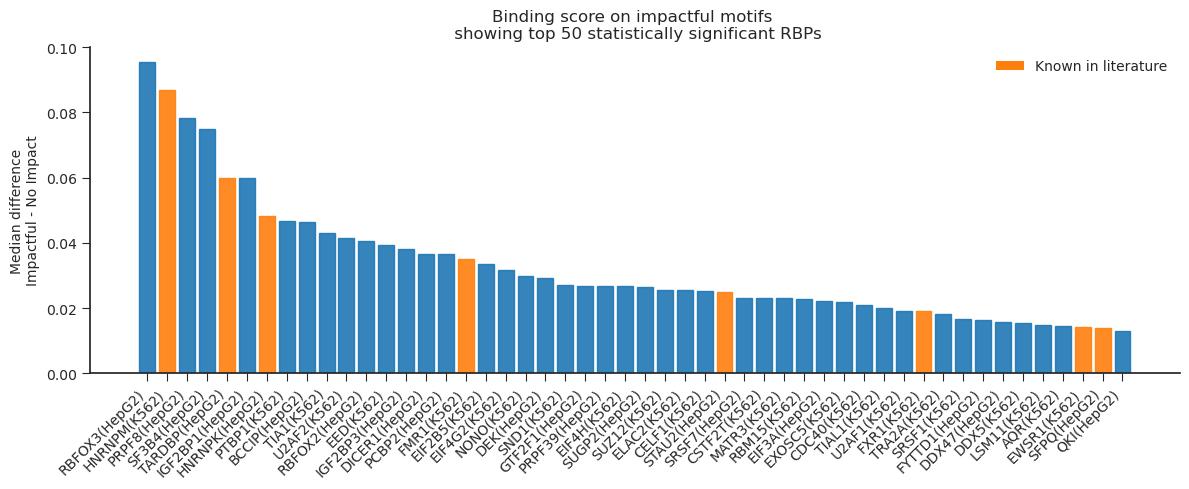

In [14]:
# Create the figure and axis
plt.figure(figsize=(12, 5))

# Create bars
bars = plt.bar(range(len(top_stat)), top_stat['median difference'], alpha=0.9)

known_shuttlers = [
    'TARDBP(HepG2)', 'HNRNPM(K562)', 
    'FMR1(K562)', 'HNRNPM(HepG2)', 
    'HNRNPK(HepG2)', 'HNRNPK(K562)', 
    'STAU2(HepG2)', 'FXR1(K562)',
    'EWSR1(K562)', 'SFPQ(HepG2)',
]

# Color the bars based on category
colors = [palette[1] if known in known_shuttlers else palette[0] for known in top_stat['pretty name']]
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Customize the plot
plt.xticks(range(len(top_stat)), top_stat['pretty name'], rotation=45, ha='right')
plt.ylabel(f'Median difference\nImpactful - No Impact')
plt.title(f'Binding score on impactful motifs \n showing top {topn} statistically significant RBPs')
sns.despine()

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=palette[1], label='Known in literature')]
plt.legend(handles=legend_elements) # , title='Synapse localization effect')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.savefig(figdir / f'human_30bp_barplot_top{topn}.pdf')

# Plotting homer results

In [15]:
# homer scoring of known motif
stat_homer = pd.read_csv(outdir / 'motif_enrichment_human_all_30bp.csv', index_col = 0)  # from 4_analyze_known_motif-30bp.ipynb
stat_homer.head()

,experiment,category,p-value,odds ratio,sig,FDR,l2or,-log10 FDR,RBP,is_SynGO
0,ZRANB2_GGTAAGGT,<-0.1,0.275991,0.000000,False,0.387211,-inf,0.412052,ZRANB2,False
1,ZRANB2_GGTAAGGT,>0.1,0.409391,1.900976,False,0.549754,0.926741,0.259832,ZRANB2,False
2,ZFP36_TATTTATT,<-0.1,0.008436,0.488951,True,0.015549,-1.032239,1.808288,ZFP36,False
3,ZFP36_TATTTATT,>0.1,0.001925,0.000000,True,0.003731,-inf,2.428218,ZFP36,False
4,CELF3_GTGTGTGT,<-0.1,0.186844,0.739449,False,0.270206,-0.435478,0.568306,CELF3,False


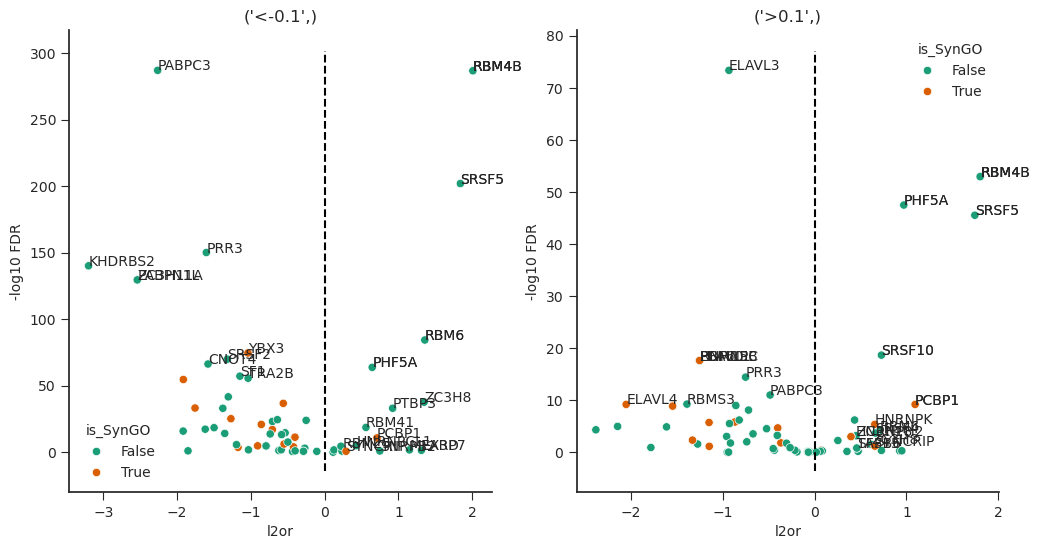

In [16]:
f, axes = plt.subplots(1,2, figsize = (12,6))
for ax, (name, group) in zip(axes.flatten(),stat_homer.groupby(by = ['category'])):
    sns.scatterplot(data = group, x = 'l2or', y = '-log10 FDR', ax = ax, hue = 'is_SynGO')
    ax.set_title(name)
    sig1 = group.loc[(group['sig'])].sort_values(by = 'odds ratio', ascending = False).iloc[:15]
    sig2 = group.loc[(group['sig'])].sort_values(by = '-log10 FDR', ascending = False).iloc[:15]
    sig = pd.concat([sig1, sig2], axis = 0)
    for index, row in sig.iterrows():
        ax.text(row['l2or'], row['-log10 FDR'], row['experiment'].split('_')[0])
    ax.vlines(x = 0, ymin = ax.get_ylim()[0],ymax = ax.get_ylim()[1], linestyle = 'dashed', color = 'black')
sns.despine()
plt.savefig(figdir / 'human_30bp_volcano_HOMER.pdf')

# Exploratory analysis for RBPNet score analysis

In [17]:
# make string network
','.join(stat_all.loc[(stat_all['FDR']<0.05)&(stat_all['category']=='<-0.1')&
         (stat_all['median difference']>0.02),
'RBP_official'].tolist())

# the median difference threshold is arbitrary
# go to STRING, https://string-db.org/cgi/input?sessionId=b97EwZq9WRAL&input_page_show_search=on
# select mutliple proteins
# paste this into the list of names
# organism select human

'SUGP2,CELF1,DICER1,HNRNPM,RBM15,ELAC2,DEK,EIF3A,TIA1,IGF2BP1,SRSF7,BCCIP,IGF2BP3,SF3B4,RBFOX2,U2AF2,PRPF8,EXOSC5,EIF4G2,PRPF39,TARDBP,NONO,RBFOX3,MATR3,PCBP2,STAU2,EIF2B5,SUZ12,EED,EIF4H,PRPF8,MATR3,SND1,EIF4G2,FMR1,HNRNPK,PTBP1,TIA1,RBFOX3,TARDBP,CDC40,CSTF2T,IGF2BP1,NONO,U2AF2,GTF2F1,HNRNPM,PTBP1'

In [18]:
# make string network
','.join(stat_all.loc[(stat_all['FDR']<0.05)&(stat_all['category']=='>0.1')&
         (stat_all['median difference']>0.02),
'RBP_official'].tolist())

# the median difference threshold is arbitrary
# go to STRING, https://string-db.org/cgi/input?sessionId=b97EwZq9WRAL&input_page_show_search=on
# select mutliple proteins
# paste this into the list of names
# organism select human

'HNRNPM,IGF2BP1,SRSF7,BCCIP,IGF2BP3,SF3B4,RBFOX2,PRPF8,RBFOX3,EIF4G2,FMR1,HNRNPK,TIA1,TARDBP,CSTF2T,U2AF2,HNRNPM'

In [19]:
stat_all.loc[(stat_all['sig'])&(stat_all['category']=='<-0.1')&(stat_all['median difference']>0),
'RBP_official'].shape

(144,)

Text(0.5, 0, '<-0.1 median difference')

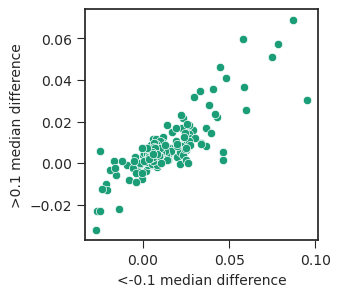

In [20]:
# correlating the score for supressing and enhancing motifs
f, ax = plt.subplots(figsize = (3,3))
median_difference_pv = pd.pivot_table(stat_all, index = 'RBPNet_model', columns = 'category',
               values = 'median difference')
sns.scatterplot(data =median_difference_pv,
                x = '<-0.1',
                y = '>0.1',
               ax = ax)
plt.ylabel('>0.1 median difference')
plt.xlabel('<-0.1 median difference')

In [21]:
# correlating changes with model performance
tabledir = Path('/tscc/nfs/home/hsher/ps-yeolab5/ENCODE_paper_tables/')
metrics=pd.read_csv(tabledir/'model_performance.csv', index_col = 0)

Text(0.5, 1.0, 'Pearson r=0.22')

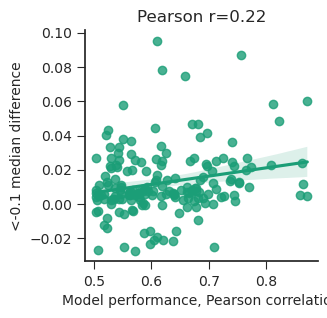

In [22]:
merged_pv = median_difference_pv.merge(metrics, left_index = True, right_on = 'Experiment')
f, ax = plt.subplots(figsize = (3,3))
sns.regplot(data = merged_pv, y = '<-0.1', x = 'dlogodds pearson(total>50)')
sns.despine()
from scipy.stats import pearsonr
r, p = pearsonr(merged_pv['<-0.1'], merged_pv['dlogodds pearson(total>50)'])
plt.ylabel('<-0.1 median difference')
plt.xlabel('Model performance, Pearson correlation')
plt.title(f'Pearson r={r:.2f}')

Text(0.5, 1.0, 'Pearson r=0.44')

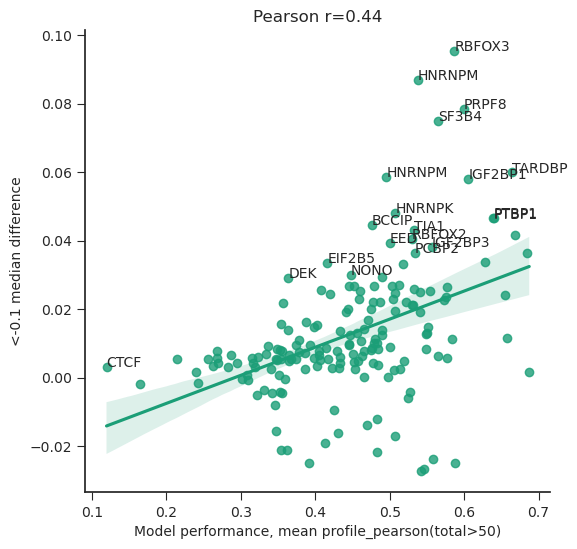

In [23]:
#merged_pv = median_difference_pv.merge(metrics, left_index = True, right_on = 'Experiment')
from scipy.stats import pearsonr
import numpy as np
from sklearn.linear_model import LinearRegression
f, ax = plt.subplots(figsize = (6,6))
xcol = 'mean profile_pearson(total>50)'
ycol = '<-0.1'
sns.regplot(data = merged_pv, y = ycol, x = xcol)
sns.despine()

r, p = pearsonr(merged_pv[ycol], merged_pv[xcol])



X = merged_pv[[xcol]]

# y = 1 * x_0 + 2 * x_1 + 3

y = merged_pv[ycol]
reg = LinearRegression().fit(X, y)
merged_pv[f'predicted_median_{ycol}']=reg.predict(X)
merged_pv[f'residual_{ycol}']=y-merged_pv[f'predicted_median_{ycol}']

for index, row in merged_pv.sort_values(by = f'residual_{ycol}', ascending = False).iloc[:20].iterrows():
    ax.text(row[xcol], row[ycol], row['Experiment'].split('_')[0])
plt.ylabel(f'{ycol} median difference')
plt.xlabel(f'Model performance, {xcol}')
plt.title(f'Pearson r={r:.2f}')

Text(0.5, 1.0, 'Pearson r=0.22')

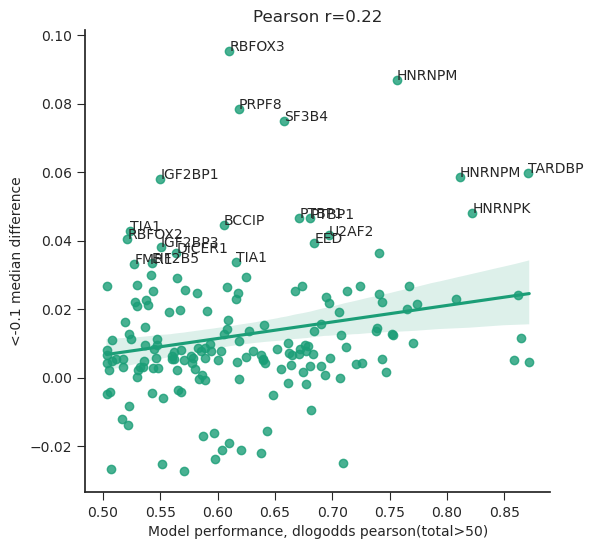

In [24]:
#merged_pv = median_difference_pv.merge(metrics, left_index = True, right_on = 'Experiment')
from scipy.stats import pearsonr
import numpy as np
from sklearn.linear_model import LinearRegression
f, ax = plt.subplots(figsize = (6,6))
xcol = 'dlogodds pearson(total>50)'
ycol = '<-0.1'
sns.regplot(data = merged_pv, y = ycol, x = xcol)
sns.despine()

r, p = pearsonr(merged_pv[ycol], merged_pv[xcol])



X = merged_pv[[xcol]]

# y = 1 * x_0 + 2 * x_1 + 3

y = merged_pv[ycol]
reg = LinearRegression().fit(X, y)
merged_pv[f'predicted_median_{ycol}']=reg.predict(X)
merged_pv[f'residual_{ycol}']=y-merged_pv[f'predicted_median_{ycol}']

for index, row in merged_pv.sort_values(by = f'residual_{ycol}', ascending = False).iloc[:20].iterrows():
    ax.text(row[xcol], row[ycol], row['Experiment'].split('_')[0])
plt.ylabel(f'{ycol} median difference')
plt.xlabel(f'Model performance, {xcol}')
plt.title(f'Pearson r={r:.2f}')

# exploratory analysis for homer results

Text(0.5, 0, '<-0.1 odds ratio')

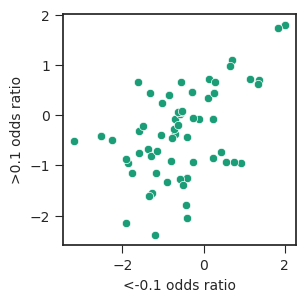

In [25]:
pv = pd.pivot_table(stat_homer, index = 'experiment', columns = 'category',
               values = 'l2or')

f, ax = plt.subplots(figsize = (3,3))

sns.scatterplot(data =pv,
                x = '<-0.1',
                y = '>0.1',ax = ax)
plt.ylabel('>0.1 odds ratio')
plt.xlabel('<-0.1 odds ratio')

In [26]:
','.join(stat_homer.loc[(stat_homer['FDR']<0.05)&(stat_homer['category']=='<-0.1')&
         (stat_homer['odds ratio']>1),
'RBP'].tolist())


'MEX3D,ZC3H8,LARP7,HNRNPCL1,SRSF5,RBM25,SRSF10,PTBP3,HNRNPH2,ZC3H18,RBM4B,RBM4,RBM6,CELF1,PHF5A,RBM41,PCBP1'

In [27]:
','.join(stat_homer.loc[(stat_homer['FDR']<0.05)&(stat_homer['category']=='>0.1')&
         (stat_homer['odds ratio']>1),
'RBP'].tolist())


'ZC3H8,SRSF5,RBM25,SRSF10,TRA2B,HNRNPH2,ZC3H18,SRSF2,RBM4B,HNRNPK,EXOSC2,RBM4,RBM6,SRSF4,PHF5A,PCBP2,PCBP1'